In [116]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("cars.csv") #currently doing with dataset that has date and values testing for time series
df.head
#df['date'] = df['date'].astype(str)

# Strip any leading/trailing whitespace
#df['date'] = df['date'].str.strip()

# Convert the 'date' column to datetime, coercing errors
#df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any 'NaT' values that failed to convert
#invalid_dates = df[df['date'].isna()]
#if not invalid_dates.empty:
    #print("Entries that could not be converted:")
    #print(invalid_dates)

# Verify the conversion
print(df.dtypes)
print(df.head())


cars    int64
dtype: object
   cars
0     4
1     2
2     1
3     0
4     3


In [117]:
df.head()

,cars
0,4
1,2
2,1
3,0
4,3


In [118]:
#ts=df['cars'].resample('D').sum or .mean
#we may choose to resample the data per day or weekly, here there is no minutes rule so we have to ensure the data coming in is already
#minutes wise

<Axes: >

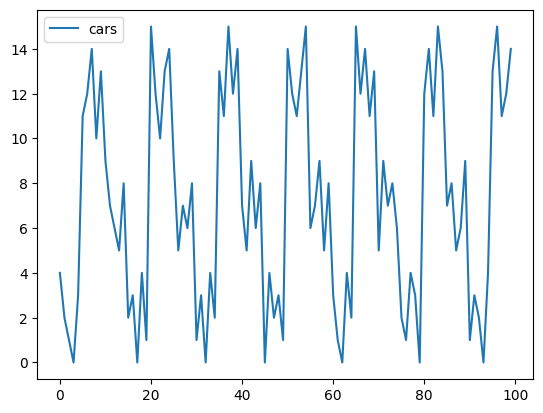

In [119]:
#df.plot(x='date',y='cars')
df.plot()


**Stationarity check: we can do ACF and PCAF checks here**

In [120]:
import statsmodels.api as sm
print(df.dtypes)


cars    int64
dtype: object


In [121]:
train = df[:70]
test= df[70:]

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



print(train.dtypes)
print(train.head())

cars    int64
dtype: object
   cars
0     4
1     2
2     1
3     0
4     3


ACF Values: [ 1.          0.54046834  0.40945101  0.04220448 -0.11213894 -0.46635898
 -0.42151421 -0.45063523 -0.4300285  -0.35610881 -0.35456349 -0.06621184
  0.05419015  0.36598411  0.46260405  0.7479427   0.41670901  0.31123505
  0.0215395  -0.0801794  -0.38734493 -0.32759613 -0.34186678 -0.3147155
 -0.30048343 -0.27361826 -0.05536112  0.03921141  0.28108074  0.35625212
  0.56853692  0.31394227  0.23583556  0.01879153 -0.09060736]
PACF Values: [ 1.00000000e+00  5.48301210e-01  1.72812954e-01 -3.56424510e-01
 -1.47223299e-01 -4.57568533e-01 -8.27620614e-03 -2.44758022e-02
 -4.12540091e-01 -2.18644028e-01 -7.85880684e-01 -1.31015997e-01
 -4.48364189e-01 -3.10330172e-01  5.20498833e-02  6.82334829e-01
  3.28160831e-01  1.66808539e-01  1.60398505e-01  1.66997001e+00
 -1.58512776e+00 -8.56850600e-01 -2.74274341e+00  1.01028732e+00
  1.72182331e+01 -1.00732530e+00 -2.54378185e+00  1.83631003e+00
  7.36587445e-01  8.29344323e-01  2.28013352e+00 -4.76510911e-01
  1.13729368e+00  3.10313280e

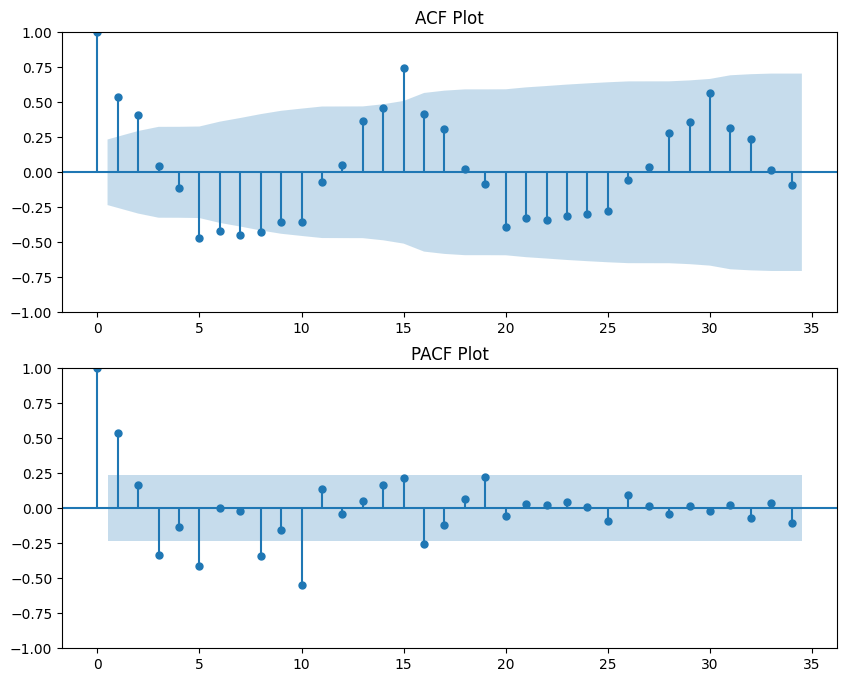

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Assuming train is your DataFrame
max_lags = 34  # Set to the maximum number of lags that works

# Calculate ACF and PACF values
acf_values = acf(train["cars"], nlags=max_lags)
pacf_values = pacf(train["cars"], nlags=max_lags)

# Store in variables
acf_original = acf_values
pacf_original = pacf_values

# Print the ACF and PACF values
print("ACF Values:", acf_original)
print("PACF Values:", pacf_original)

# Plot ACF with the current number of lags
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train["cars"], lags=max_lags, ax=ax[0])
ax[0].set_title('ACF Plot')

# Plot PACF with the current number of lags
plot_pacf(train["cars"], lags=max_lags, ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

In [124]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train["cars"])
print(f'p-value: {adf_test[1]}')

p-value: 2.2845786620753743e-11


In [125]:

import pmdarima as pm
#auto_arima = pm.auto_arima(train["cars"], stepwise=False, seasonal=False)
#auto_arima
auto_arima = pm.auto_arima(train["cars"],
                              start_p=0, max_p=5,
                              start_q=0, max_q=5,
                              seasonal=True, # Set True if you expect seasonality
                              stepwise=True,
                              trace=True)
auto_arima


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=421.605, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=398.971, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.514, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=503.526, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=398.771, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=393.022, Time=0.30 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=393.754, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=370.438, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=395.916, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=371.615, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=372.748, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=396.098, Time=0.12 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=406.098, Time=0.10 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Tota

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

In [126]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -179.219
Date:                Sun, 18 Aug 2024   AIC                            370.438
Time:                        15:38:50   BIC                            383.929
Sample:                             0   HQIC                           375.797
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4120      0.355      6.796      0.000       1.716       3.108
ar.L1          1.0987      0.150      7.329      0.000       0.805       1.392
ar.L2          0.0836      0.265      0.315      0.752      -0.436       0.603
ar.L3         -0.5141      0.132     -3.880      0.000      -0.774      -0.254
ma.L1         -0.9821      0.266     -3.695      0.000      -1.503      -0.461
sigma2         9.4061      3.346      2.811      0.005       2.849      15.963
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.58   Prob(JB):                         0.27
Heteroskedasticity (H):               1.25   Skew:                             0.30
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

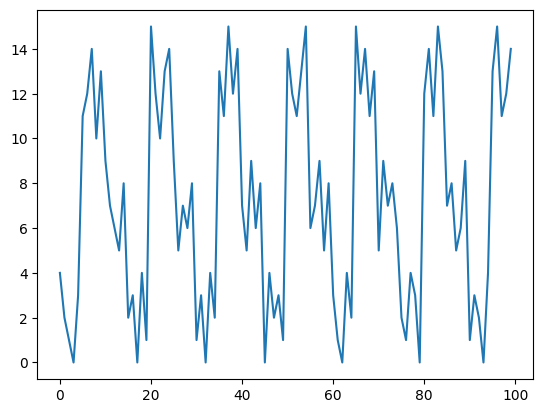

In [127]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

df["cars"].plot()

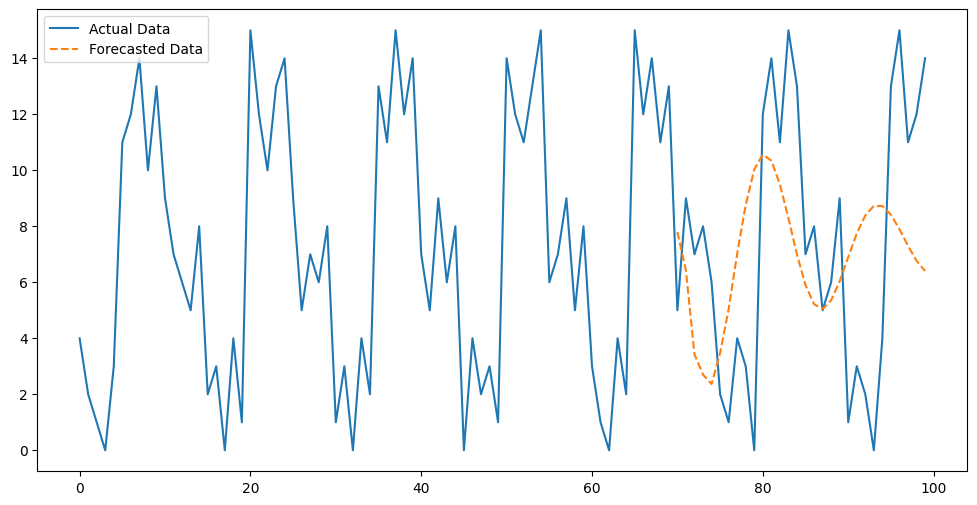

In [132]:
import matplotlib.pyplot as plt


# Ensure the forecast is aligned with the test data
forecast_test_auto = auto_arima.predict(n_periods=30)

# Create a new series that combines the train data with the forecast
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

# Plot the actual data and the forecasted data
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df["cars"], label='Actual Data')

# Plot forecasted data
plt.plot(df['forecast_auto'], label='Forecasted Data', linestyle='--')

plt.legend()
plt.show()


In [128]:
def predict_future(data, start_index, periods, model):
    # Select the data up to the start index for model training
    train_data = data[:start_index]
    
    # Fit the ARIMA model to the selected training data
    model.fit(train_data)
    
    # Predict for the number of periods specified
    future_forecast = model.predict(n_periods=periods)
    
    return future_forecast

In [ ]:
start_index = 50  # Replace with your desired start index
periods_to_predict = 30  # Number of periods to predict into the future

# Assuming 'auto_arima' is the trained model and 'df["cars"]' is your data
future_predictions = predict_future(df["cars"], start_index, periods_to_predict, auto_arima)

print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions)
